# **Hand gesture recognition using Sign Language MNIST dataset**

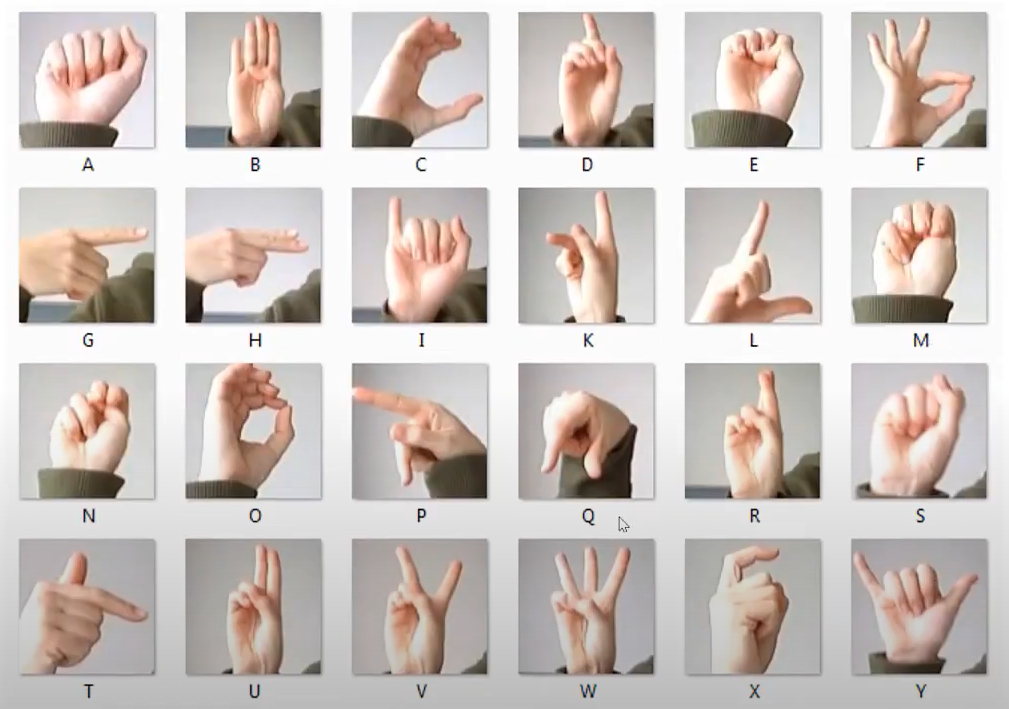

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/sign_mnist_test.csv/sign_mnist_test.csv')
train = pd.read_csv('/content/drive/MyDrive/sign_mnist_train.csv/sign_mnist_train.csv')

In [ ]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [ ]:
# Get our training labels
labels = train['label'].values

In [ ]:
# view the unique labels
unique_val = np.array(labels)
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

In [ ]:
# Drop Training Labels from our training data so we can separate it
train.drop('label', axis=1, inplace = True)

In [ ]:
# Extracting the image data from each row in our csv
images = train.values
images = np.array([np.reshape(i, (28, 28)) for i in images])
images = np.array([i.flatten() for i in images])

In [ ]:
# one hot encoding our labels
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
labels = label_binarizer.fit_transform(labels)

In [ ]:
# viewing our labels
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [ ]:
len(labels[0])

24

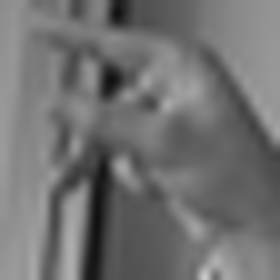

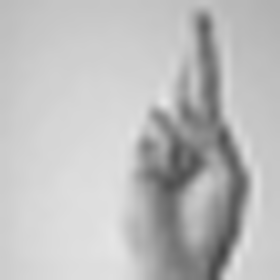

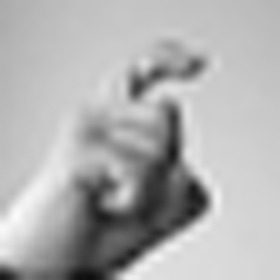

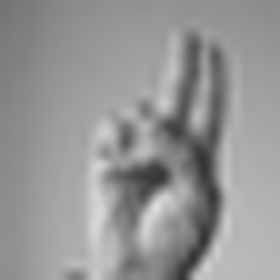

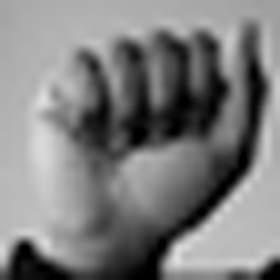

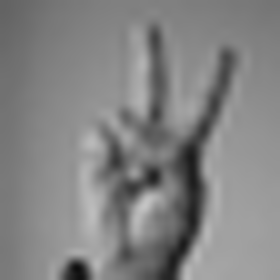

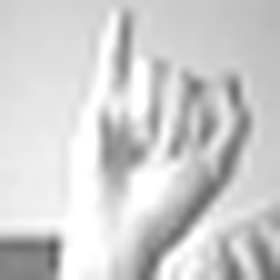

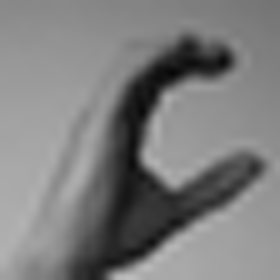

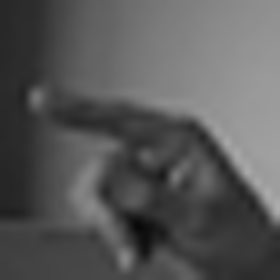

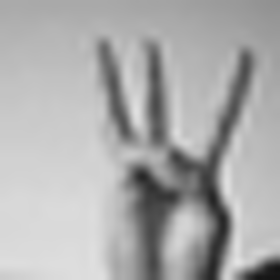

In [ ]:
# using OpenCV to view 10 random images from our training data
from google.colab.patches import cv2_imshow

for i in range(0,10):
  rand = np.random.randint(0, len(images))
  input_im = images[rand]

  sample = input_im.reshape(28,28).astype(np.uint8)
  sample = cv2.resize(sample, None, fx=10, fy=10, interpolation = cv2.INTER_CUBIC)
  cv2_imshow(sample)
  cv2.waitKey(0)

cv2.destroyAllWindows()

In [ ]:
# Spliting our data into x_train, x_test, y_train and y_test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.3, random_state = 101)

In [ ]:
# loading tensorFlow modules and defining batch size, epochs, num_classes
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

batch_size = 128
num_classes = 24
epochs = 10

In [ ]:
# scaling images
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
# Reshaping images into the size required by TF and Keras
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [ ]:
# Creating CNN Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))

model.add(Dense(num_classes, activation = 'softmax'))

In [ ]:
# compiling our Model
model.compile(loss = 'categorical_crossentropy', optimizer= Adam(), metrics=['accuracy'])

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 1, 1, 64)          0

In [ ]:
# training our model
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/10
151/151 [==============================] - 59s 363ms/step - loss: 2.5926 - accuracy: 0.2064 - val_loss: 1.6013 - val_accuracy: 0.4936
Epoch 2/10
151/151 [==============================] - 51s 339ms/step - loss: 1.2369 - accuracy: 0.5801 - val_loss: 0.9400 - val_accuracy: 0.6695
Epoch 3/10
151/151 [==============================] - 51s 337ms/step - loss: 0.7528 - accuracy: 0.7435 - val_loss: 0.5406 - val_accuracy: 0.8191
Epoch 4/10
151/151 [==============================] - 50s 330ms/step - loss: 0.5091 - accuracy: 0.8258 - val_loss: 0.3311 - val_accuracy: 0.8991
Epoch 5/10
151/151 [==============================] - 33s 219ms/step - loss: 0.3604 - accuracy: 0.8777 - val_loss: 0.2585 - val_accuracy: 0.9184
Epoch 6/10
151/151 [==============================] - 33s 218ms/step - loss: 0.2655 - accuracy: 0.9088 - val_loss: 0.1512 - val_accuracy: 0.9578
Epoch 7/10
151/151 [==============================] - 32s 212ms/step - loss: 0.2027 - accuracy: 0.9326 - val_loss: 0.1238 - val_ac

In [ ]:
# saving Model
model.save("sign_mnist_cnn_50_Epochs.h5")
print("Model Saved")

Model Saved


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


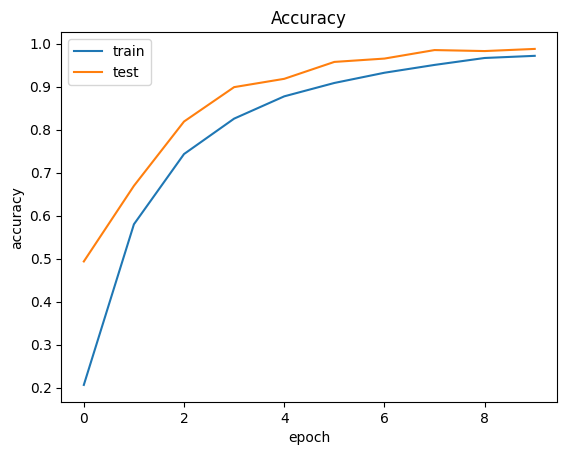

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])

plt.show()

In [ ]:
# Reshaping test data so that we can evaluate it's performance on unseen data
test_labels = test['label']
test.drop('label', axis = 1, inplace = True)

test_images = test.values
test_images = np.array([np.reshape(i, (28, 28)) for i in test_images])
test_images = np.array([i.flatten() for i in test_images])

test_labels = label_binarizer.fit_transform(test_labels)

test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

test_images.shape

y_pred = model.predict(test_images)

225/225 [==============================] - 6s 27ms/step


In [ ]:
# accuracy
from sklearn.metrics import accuracy_score

accuracy_score(test_labels, y_pred.round())

0.7196040156162855